# Projeto

Neste projeto vamos criar um modelo que vai nos ajudar a predizer a rotatividades de clientes de uma empresa de telecomunicações.

Para montar esse modelo, primeiro temos que verificar os dados que possuímos e ver fazer uma análise em cima dos mesmos para verificar o padrão dos clientes que costumam encerrar seu plano e aqueles que continuam.

# Importando bibliotecas e montando drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Importando os aquivos com dados

Recebemos quatro arquivos para nosso projeto:
- Contract com as informações de contratos;
- Internet com as informações sobre os planos de internet oferecidos;
- Personal com as informações pessoais de cada cliente;
- Phone com as informações de multiplas linhas

## DF Contract


Este data frame contém as informações dos contratos, como início, final, pagamento, e cargas mensais e totais.

In [3]:
df_contract = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/Ciencia_de_Dados/Practicum/Projeto Final/contract.csv')
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
df_contract.duplicated().sum()

0

In [6]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Neste ponto é perceptível que não temos dados duplicados no data frame e que existem dados ausentes na coluna TotalCharges. Ainda não irei mexer neles, mais pra frente após a junção das tabelas vou verificar qual o melhor caminho a seguir.

Na próxima cálula de código transformeu as colunas 'BeginDate' em data (vamos usar mais adiante para calcular o tempo de permanência de cada cliente). E a coluna 'TotalCharges' para numérico (finalidade de análises).

In [7]:
# Transformando a coluna BeginDate em data
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format = '%Y-%m-%d').dt.date

# Transformando a coluna TotalCharges em float
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'],errors='coerce')

In [8]:
df_contract.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


Aqui podemos ter uma visão descritiva dos tipos de cargas dos clientes.
- Coluna MonthlyCharges:
  - A média é de 64,7 por mês, enquanto a mediana está na faixa de 70,3/mês.
  - O menor valor mensal que temos é de 18,2 e o maior 118,7.
- coluna TotalCharges:
  -  A média está na faixa de 2.283,3 e a mediana em 1.397,4.
  - O menos valor que temos é de 18,8 e o maior é de 8.684,8.

## DF Internet

Este data frame contém informações sobre os serviços de internet, como o tipo e demais opções para os clientes, como backup, proteção, suport, segurança, e streaming


In [9]:
df_internet = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/Ciencia_de_Dados/Practicum/Projeto Final/internet.csv')
df_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
df_internet.duplicated().sum()

0

In [12]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Após breve análise, foi constatado que não existem dados ausentes e duplicados.

Contudo temos uma informação importante, a quantidade de clientes presente nesse conjunto de dados é menor que no conjunto que possui informações de contratos, por isso, os clientes que não possuem nenhum tipo serviço ou opção de internet podem não estar nesse data frame.

## DF Personal

Esse é um conjunto de dados que tem informações pessoais dos clientes, como gênero, se possuem parceiros e dependentes, e se são SeniorCitizen.

In [13]:
df_personal = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/Ciencia_de_Dados/Practicum/Projeto Final/personal.csv')
df_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [14]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
df_personal.duplicated().sum()

0

In [16]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [17]:
df_personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Neste data frame constatou-se que apenas 16,2% dos clienets são SeniorCitizen.

Além disso, não existem dados ausentes e duplicados.

## DF Phone

Este é o conjunto que permite visualizar quais clientes possuem multiplas linhas.

In [18]:
df_phone = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/Ciencia_de_Dados/Practicum/Projeto Final/phone.csv')
df_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [19]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [20]:
df_phone.duplicated().sum()

0

In [21]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

O data frame possui menos linhas de dados que o conjunto que nos mostra os contratos, vamos verificar mais adiante.

E não existem dados ausentes e duplicados.

# Agrupando os dados em um único conjunto

Para dar sequencia na análise e poder ter uma visualização mais completa de todos os dados que possuímos, juntei as tabelas em uma só.

Para isso utilizei como chave de agrupamento o ID único de cada cliente que é o mesmo em todos os conjuntos de dados.

In [22]:
# Juntando todas as informações em apenas um DF
df_geral = pd.merge(df_contract,df_internet, on = 'customerID', how = 'left')
df_geral = pd.merge(df_geral,df_personal, on = 'customerID', how = 'left')
df_geral = pd.merge(df_geral,df_phone, on = 'customerID', how = 'left')
df_geral

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No,Yes


In [23]:
# Adicionando a coluna caso o cliente encerrou o contrato (1) e ativo(0)
df_geral['EndDate'] = pd.to_datetime(df_geral['EndDate'], errors='coerce').dt.date
df_geral['encerrado'] = df_geral['EndDate'].apply(lambda x: 0 if pd.isnull(x) else 1)

No comando acima transformei os dados da coluna "EndDate" em data.

E criei uma nova coluna no data frame que nos mostra 1 caso o contrato tenha sido encerrado e 0 caso ainda esteja ativo.

In [24]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           1869 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [25]:
df_geral.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen,encerrado
count,7043.000000,7032.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,0.162147,0.265370
std,30.090047,2266.771362,0.368612,0.441561
min,18.250000,18.800000,0.000000,0.000000
25%,35.500000,401.450000,0.000000,0.000000
50%,70.350000,1397.475000,0.000000,0.000000
75%,89.850000,3794.737500,0.000000,1.000000
max,118.750000,8684.800000,1.000000,1.000000


In [26]:
# Verificando quais os dados na coluna EndDate
df_geral['EndDate'].unique()

array([NaT, datetime.date(2019, 12, 1), datetime.date(2019, 11, 1),
       datetime.date(2019, 10, 1), datetime.date(2020, 1, 1)],
      dtype=object)

Após juntar os dados de todas as tabelas em apenas uma temos os mesmos parâmetros que vimos nas tabelas anteriores. A única diferença é a coluna "encerrado" que nos mostra que 26,5% dos contratos foram finalizados.

### Adicionando a coluna que calcula o tempo de contrato até o encerramento

In [27]:
from datetime import date
data_atual = date.today()
data_atual

datetime.date(2023, 7, 25)

In [28]:
if 'encerrado' == 1:
  df_geral['tempo_contrato'] = (df_geral['EndDate'] - df_geral['BeginDate']).dt.days/30
else:
  df_geral['tempo_contrato'] = (data_atual - df_geral['BeginDate']).dt.days/30

df_geral['tempo_contrato']

0        43.366667
1        76.866667
2        46.433333
3        88.033333
4        47.433333
           ...    
7038     66.666667
7039    115.366667
7040     53.566667
7041     49.500000
7042    109.333333
Name: tempo_contrato, Length: 7043, dtype: float64

Aqui calculei o tempo de cada contrato até seu encerramento em meses, peguei os valores diários e dividi por 30.

Outro ponto importante, existem dados faltantes na coluna EndDate após eu transformar ela em data. Vou deixar dessa forma pois esse é um indicativo se o contrato foi encerrado ou não. E vou precisar trabalhar com data para poder fazer mais análises posteriores.

### Lidando com valores ausentes

Temos dados faltantes em todas as colunas relacionadas aos serviços de internet, por isso acredito que é devido ao cliente não possuir nenhum plano que contemple os serviços de internet da operadora. Como vejo que esse é o caso, vou preencher os valores faltantes com o valor 'No'.

In [29]:
df_geral['InternetService'].fillna('No', inplace = True)
df_geral['OnlineSecurity'].fillna('No', inplace = True)
df_geral['OnlineBackup'].fillna('No', inplace = True)
df_geral['DeviceProtection'].fillna('No', inplace = True)
df_geral['TechSupport'].fillna('No', inplace = True)
df_geral['StreamingTV'].fillna('No', inplace = True)
df_geral['StreamingMovies'].fillna('No', inplace = True)

O mesmo raciocínio se aplica a coluna MultipleLines.

In [30]:
df_geral['MultipleLines'].fillna('No', inplace = True)

Também existem dados ausentes na coluna TotalCharges. Para esses dados vou procurar uma correlação entre os dados ausentes e as demais variáveis.

In [31]:
df_geral[df_geral['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,encerrado,tempo_contrato
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,DSL,Yes,...,Yes,Yes,No,Female,0,Yes,Yes,No,0,42.333333
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,No,No,...,No,No,No,Male,0,No,Yes,No,0,42.333333
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,DSL,Yes,...,No,Yes,Yes,Female,0,Yes,Yes,No,0,42.333333
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,No,No,...,No,No,No,Male,0,Yes,Yes,Yes,0,42.333333
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,DSL,Yes,...,Yes,Yes,No,Female,0,Yes,Yes,No,0,42.333333
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,No,No,...,No,No,No,Male,0,Yes,Yes,No,0,42.333333
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,No,No,...,No,No,No,Male,0,Yes,Yes,Yes,0,42.333333
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,No,No,...,No,No,No,Female,0,Yes,Yes,No,0,42.333333
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,No,No,...,No,No,No,Male,0,Yes,Yes,No,0,42.333333
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,DSL,No,...,Yes,Yes,No,Female,0,Yes,Yes,Yes,0,42.333333


In [32]:
df_geral['TotalCharges'].isna().sum()/len(df_geral)

0.001561834445548772

In [33]:
df_geral = df_geral.dropna(subset=['TotalCharges'])

In [34]:
df_geral[df_geral['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,encerrado,tempo_contrato


Todos os dados ausentes na coluna TotalCharges eram de contratos ativos, e representavam menos de 1% de todo o DF, por isso achei mais viável retirar essas linhas e continuar com as análises.

### Categorizando as colunas de charges e tempo de contrato

In [35]:
pd.qcut(df_geral['MonthlyCharges'], q=4).unique()

[(18.249, 35.588], (35.588, 70.35], (70.35, 89.862], (89.862, 118.75]]
Categories (4, interval[float64, right]): [(18.249, 35.588] < (35.588, 70.35] < (70.35, 89.862] <
                                           (89.862, 118.75]]

In [36]:
df_geral['quantis_mensais'] = pd.qcut(df_geral['MonthlyCharges'], q=4)

<ipython-input-36-e76303386781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geral['quantis_mensais'] = pd.qcut(df_geral['MonthlyCharges'], q=4)


Para a coluna MonthlyCharges dividi ela em conjunto com a mesma quantidade de dados em cada faixa para poder analisar como os integrantes deste grupo se comportam em relação a demais métricas. Criando a coluna quantis_mensais.

In [37]:
pd.qcut(df_geral['TotalCharges'], q=4).unique()

[(18.799, 401.45], (1397.475, 3794.738], (401.45, 1397.475], (3794.738, 8684.8]]
Categories (4, interval[float64, right]): [(18.799, 401.45] < (401.45, 1397.475] <
                                           (1397.475, 3794.738] < (3794.738, 8684.8]]

In [38]:
df_geral['quantis_total'] = pd.qcut(df_geral['TotalCharges'], q=4)

<ipython-input-38-b6bf2055ff7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geral['quantis_total'] = pd.qcut(df_geral['TotalCharges'], q=4)


Para a coluna TotalCharges dividi ela em conjunto com a mesma quantidade de dados em cada faixa para poder analisar como os integrantes deste grupo se comportam em relação a demais métricas. Criando assim a coluna quantis_total.

In [39]:
pd.qcut(df_geral['tempo_contrato'], q=4).unique()

[(43.366, 52.533], (71.767, 99.2], (52.533, 71.767], (99.2, 119.467]]
Categories (4, interval[float64, right]): [(43.366, 52.533] < (52.533, 71.767] < (71.767, 99.2] <
                                           (99.2, 119.467]]

In [40]:
df_geral['quantis_tempo'] = pd.qcut(df_geral['tempo_contrato'], q=5)

<ipython-input-40-e4c1e73cf271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geral['quantis_tempo'] = pd.qcut(df_geral['tempo_contrato'], q=5)


Para a coluna tempo_contrato dividi ela em conjunto com a mesma quantidade de dados em cada faixa para poder analisar como os integrantes deste grupo se comportam em relação a demais métricas. Criando assim a coluna quantis_tempo.

### Análises das colunas em relação ao encerrameto do contrato

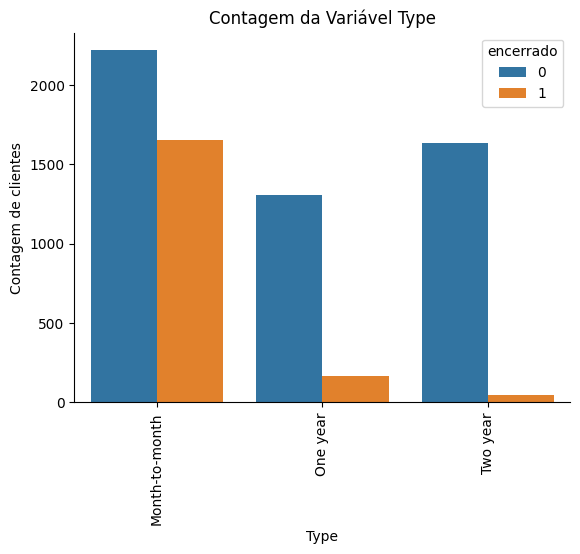

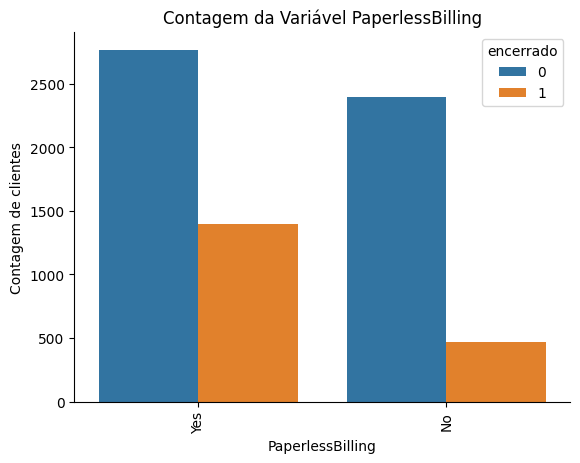

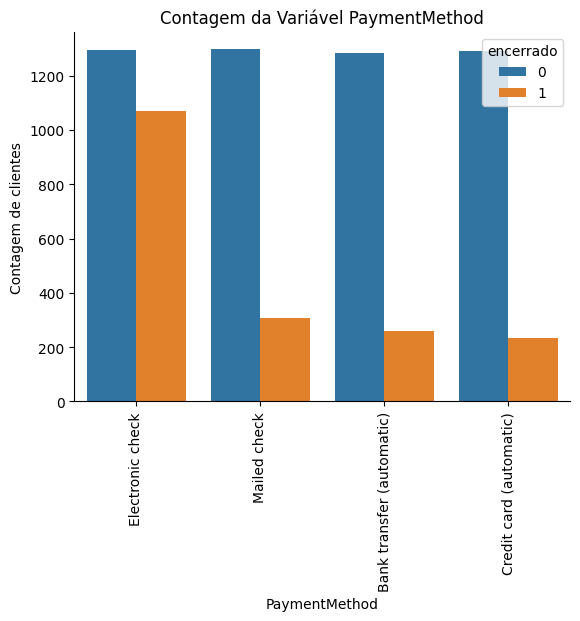

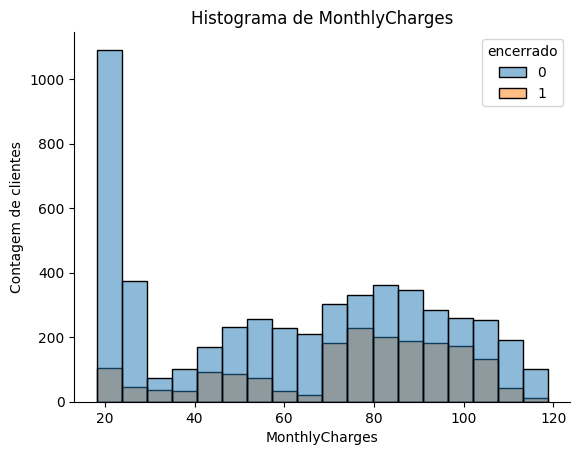

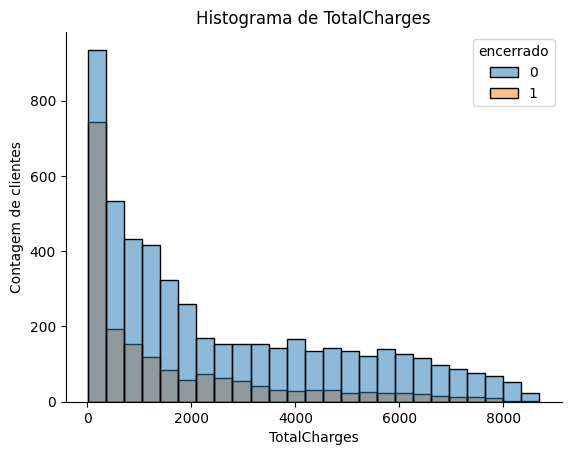

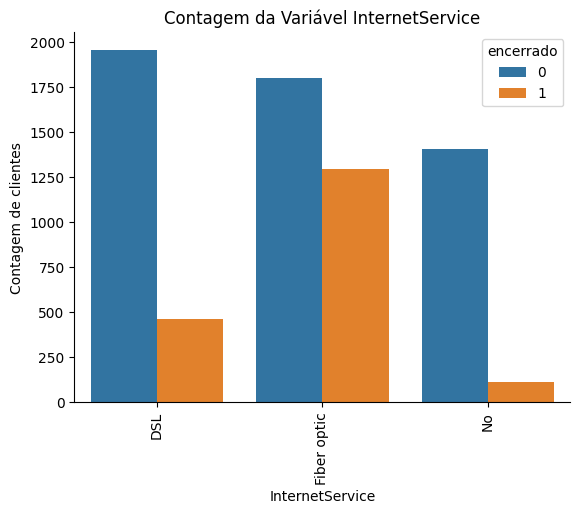

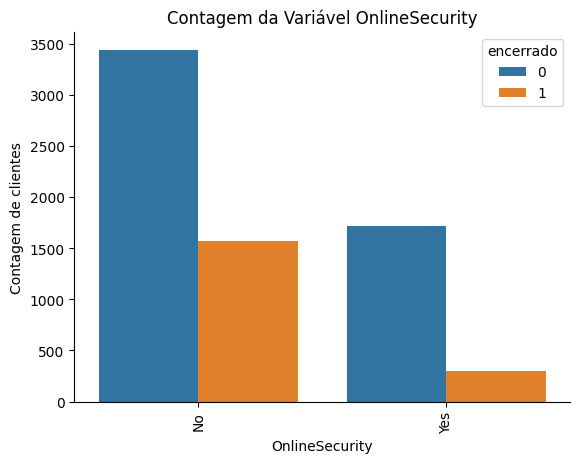

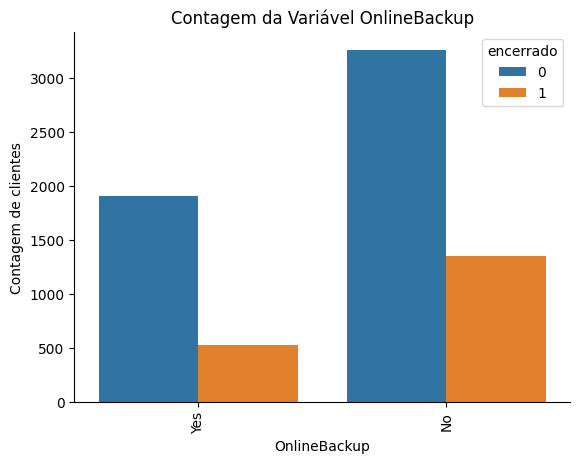

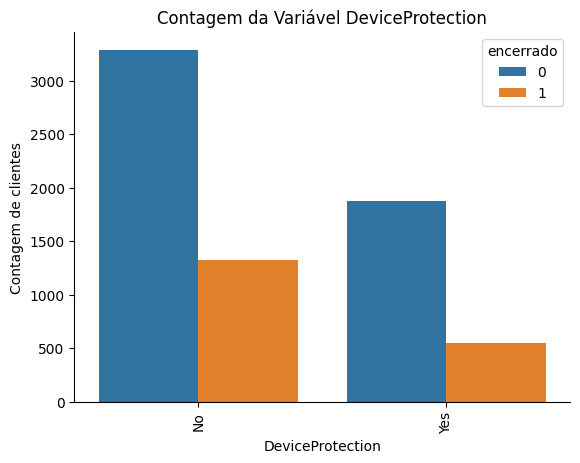

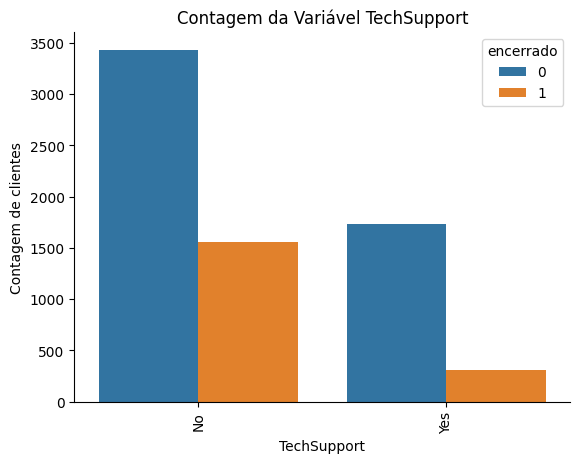

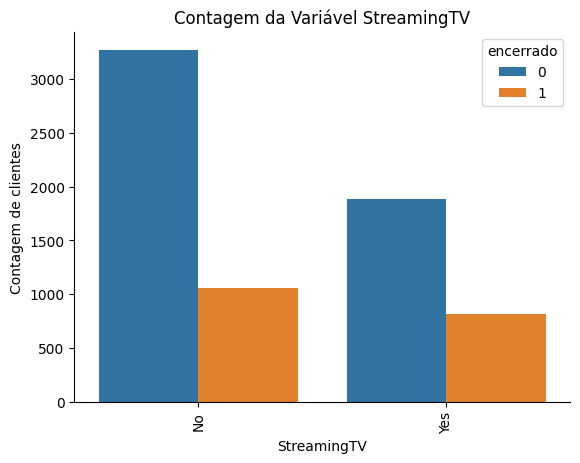

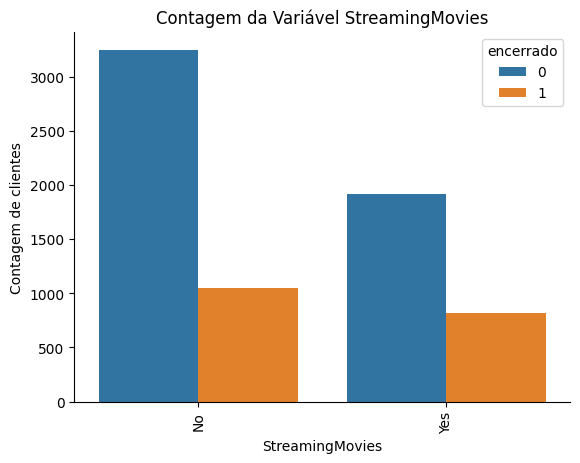

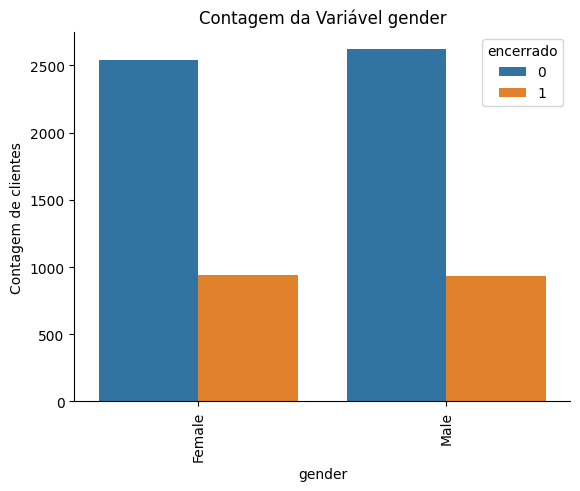

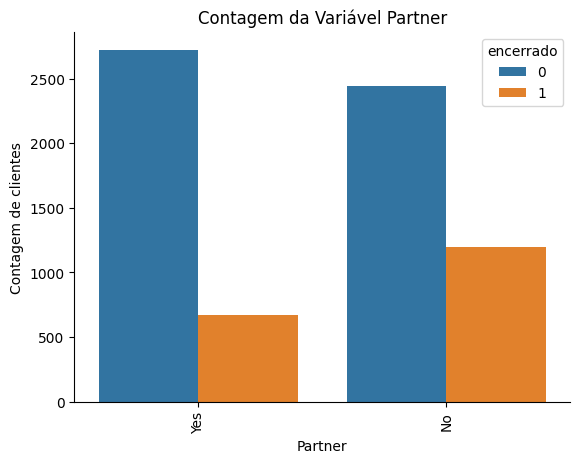

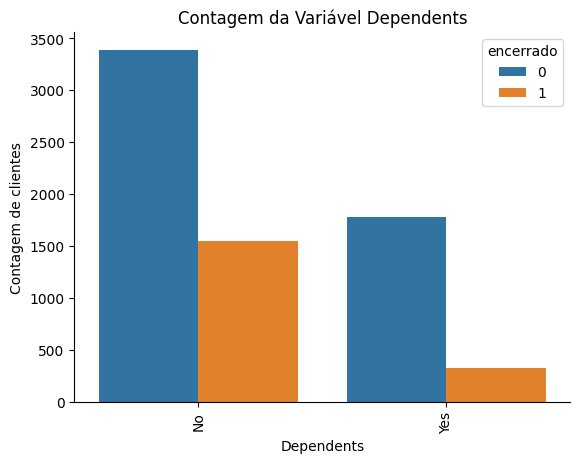

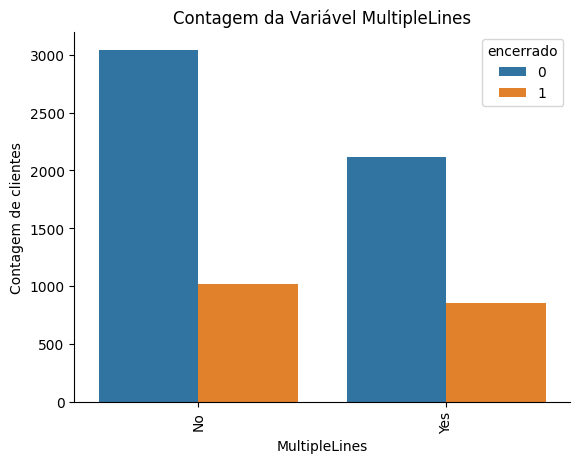

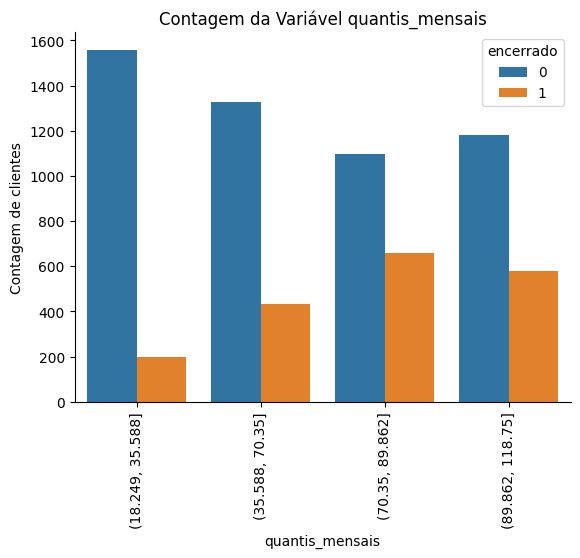

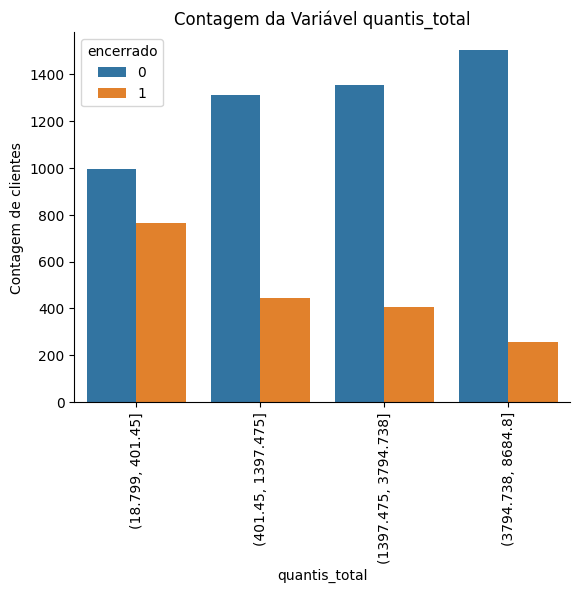

In [41]:
# Fazendo a análise de cada coluna discrimada se houve encerramento do contrato ou não
for col in df_geral.columns:
  if col == "customerID":
    continue
  elif col == 'tempo_contrato':
    continue
  elif col == 'BeginDate':
    continue
  elif col == 'EndDate':
    continue
  elif col == 'SeniorCitizen':
    continue
  elif col == 'encerrado':
    continue
  elif col == 'quantis_tempo':
    continue
  elif df_geral.dtypes[col] == 'object':
    sns.countplot(x = col, data=df_geral, hue = 'encerrado')
    _ = plt.title("Contagem da Variável " + col)
    plt.ylabel('Contagem de clientes')
    plt.xticks(rotation = 90)
    sns.despine()
    plt.show()

  elif df_geral.dtypes[col] == 'category':
    sns.countplot(x = col, data=df_geral, hue = 'encerrado')
    _ = plt.title("Contagem da Variável " + col)
    plt.ylabel('Contagem de clientes')
    plt.xticks(rotation = 90)
    sns.despine()
    plt.show()
  else:
    sns.histplot(x = col, data = df_geral, hue = 'encerrado')
    plt.title('Histograma de ' + col)
    plt.ylabel('Contagem de clientes')
    sns.despine()
    plt.show()


Aqui fiz uma análise para destinguir os contratos ativos e encerrados, e passei diversas métricas para poder visualizar algum padrão.

Podemos perceber:
- Os pagamentos mês a mês possuem maior índice de encerramento que os demais;
- O método de pagamento Eletronic Check possui o maior índice de encerramento;
- O histograma de MonthlyCharges possui 3 picos, vamos analisar ele mais adiante;
- o Histograma de TotalCharges podemos ver que possui um pico próximo ao zero, que também é onde se encontra os maiore valores de contratos encerrados.
- A Fiber Optic é o serviço de internet que mais possui encerramentos;
- Quando separamos a coluna TotalCharges por faixas, podemos perceber que quanto mais o valor aumenta, menor é o índice de desistência.
- O padrão inverte quando analisamos as faixas de cargas mensais, quanto maior a faixa de carga, maior é a quantidade de encerramentos.

### Análise das colunas em relação a data de de encerramento


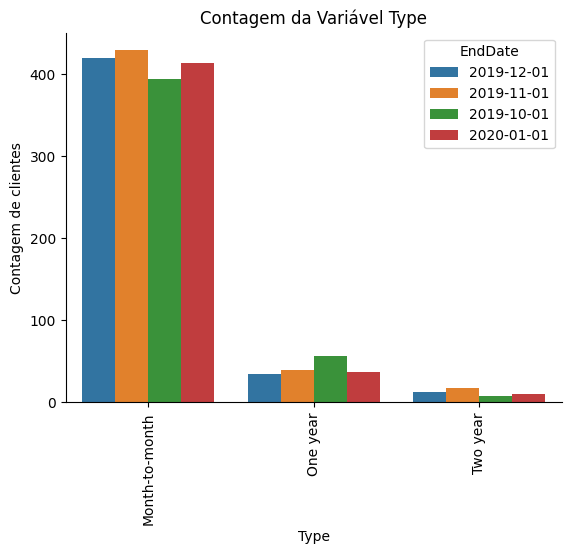

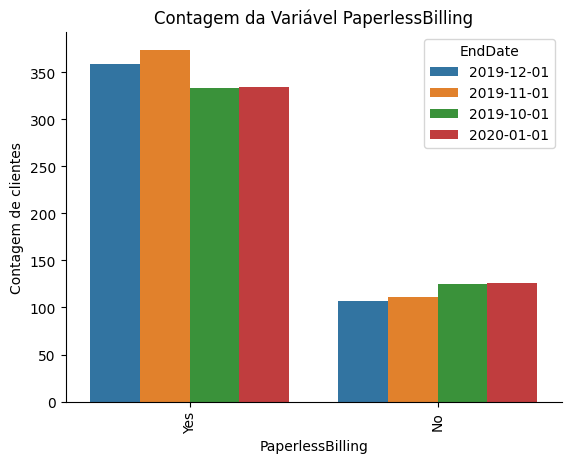

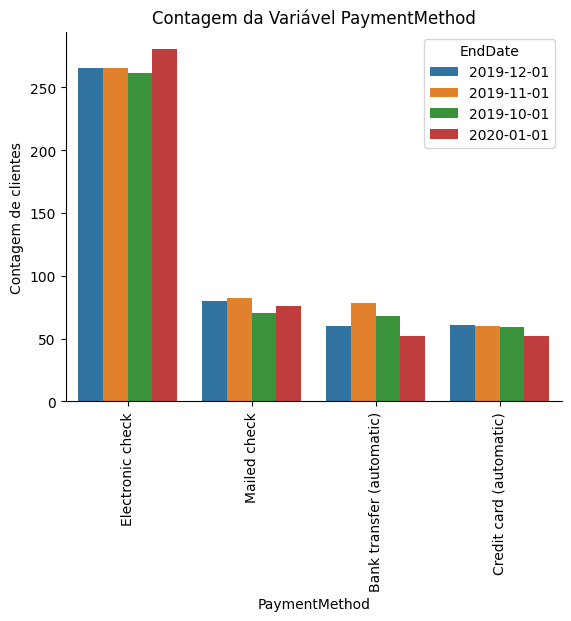

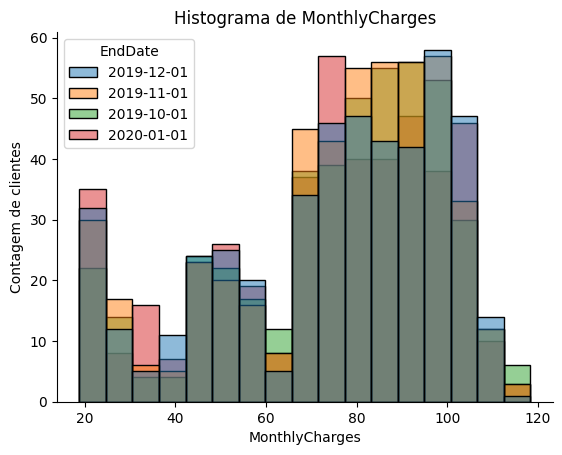

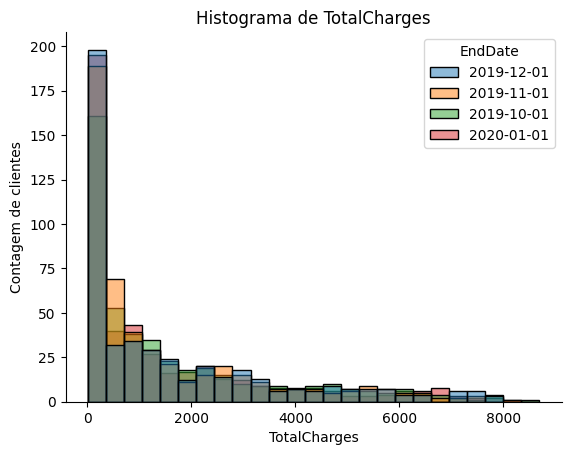

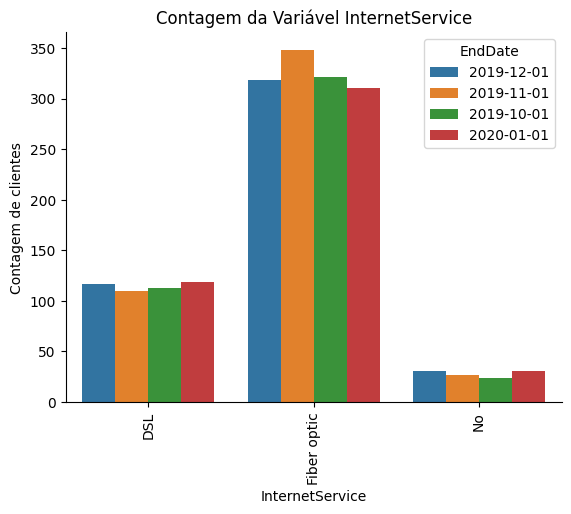

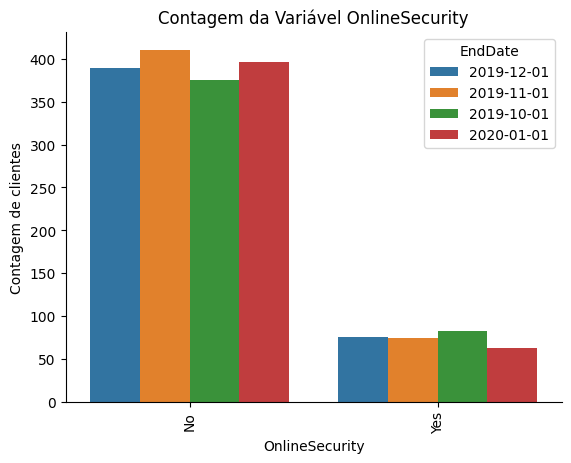

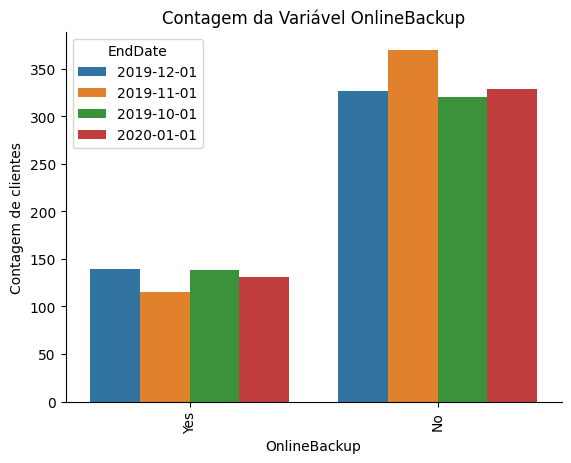

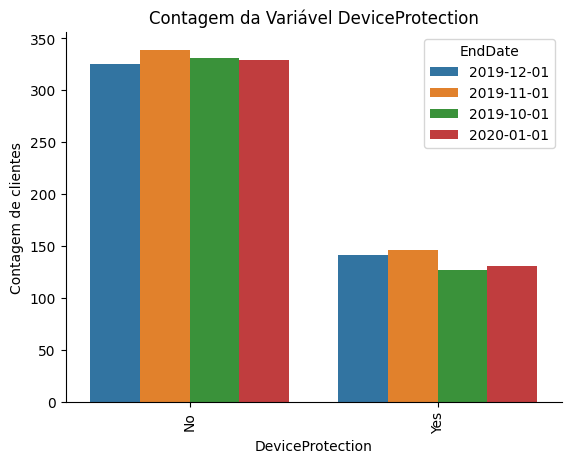

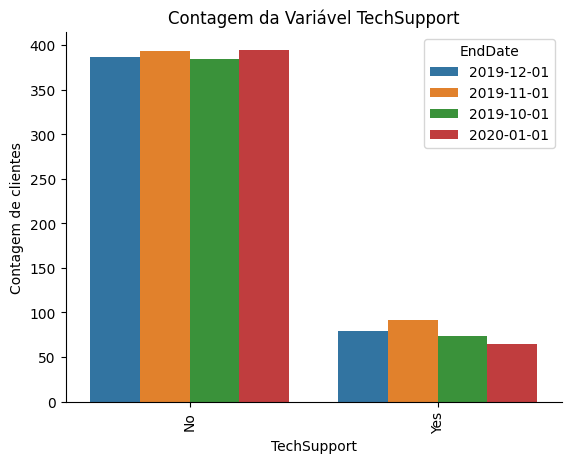

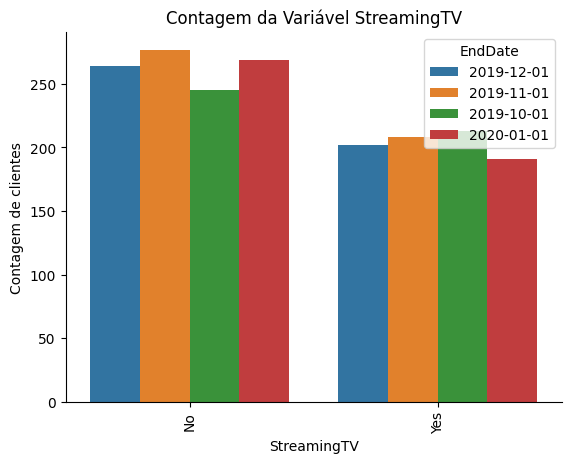

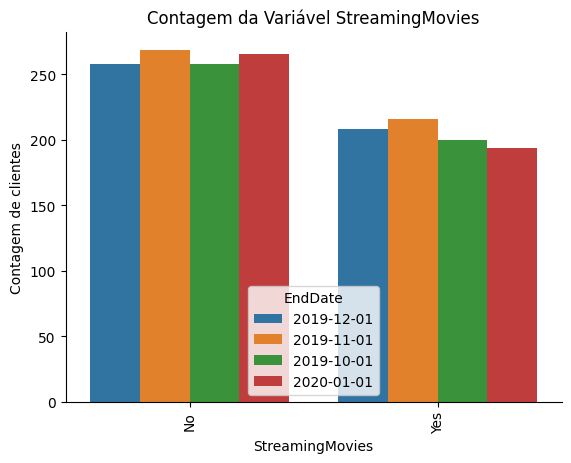

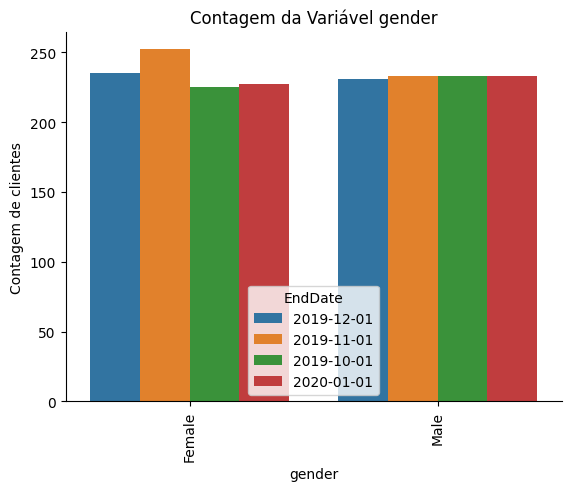

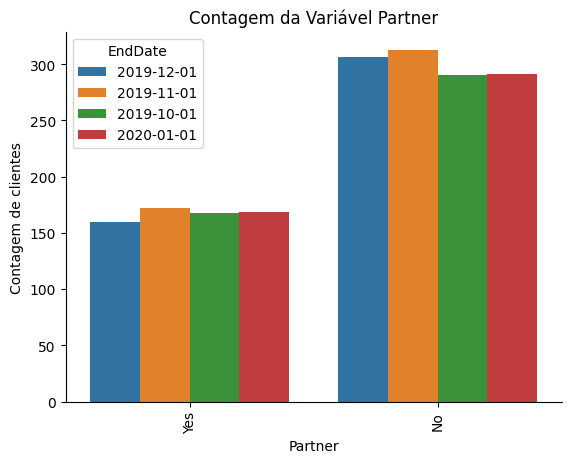

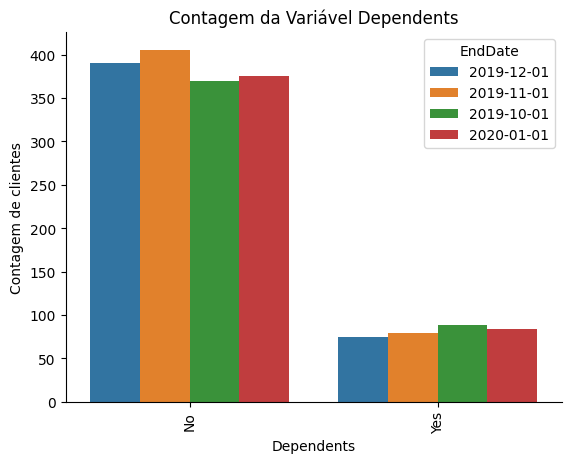

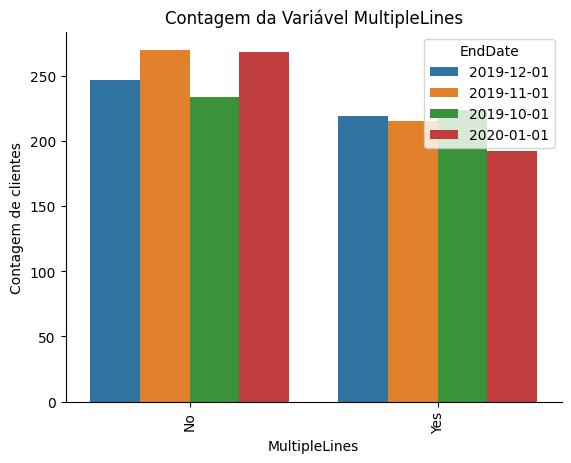

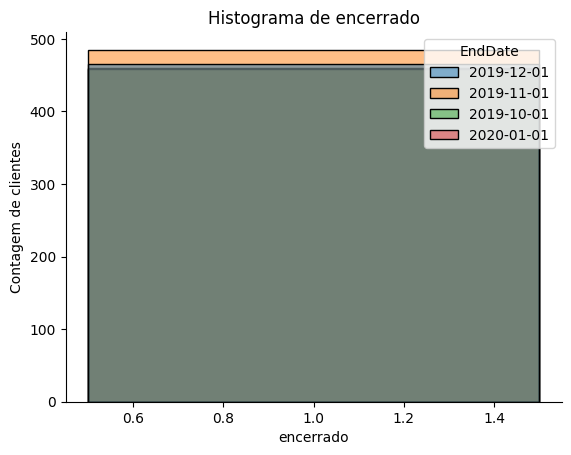

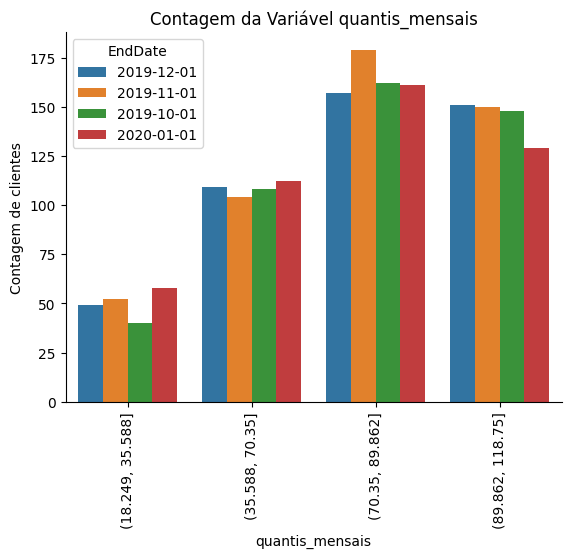

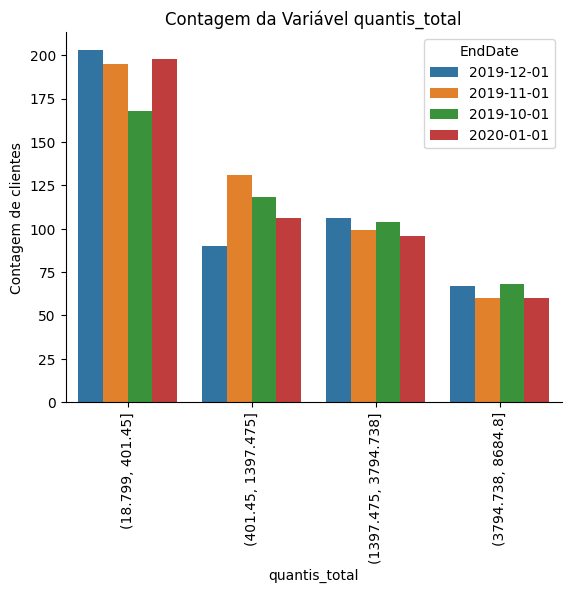

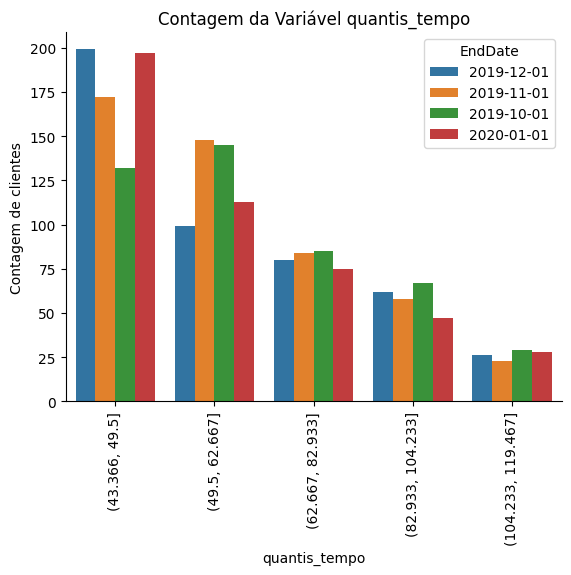

In [42]:
# Fazendo a análise de cada coluna discrimada por data de encerramento
for col in df_geral.columns:
  if col in ["customerID", 'tempo_contrato', 'BeginDate', 'EndDate', 'SeniorCitizen', 'c']:
    continue
  elif df_geral.dtypes[col] == 'object':
    sns.countplot(x = col, data=df_geral, hue = 'EndDate')
    _ = plt.title("Contagem da Variável " + col)
    plt.ylabel('Contagem de clientes')
    plt.xticks(rotation = 90)
    sns.despine()
    plt.show()
  elif df_geral.dtypes[col] == 'category':
    sns.countplot(x = col, data=df_geral, hue = 'EndDate')
    _ = plt.title("Contagem da Variável " + col)
    plt.ylabel('Contagem de clientes')
    plt.xticks(rotation = 90)
    sns.despine()
    plt.show()
  else:
    sns.histplot(x = col, data = df_geral, hue = 'EndDate')
    plt.title('Histograma de ' + col)
    plt.ylabel('Contagem de clientes')
    sns.despine()
    plt.show()


Aqui fiz uma análise das variáveis colocando como filtro as datas de saída dos contratos para poder verificar se existe algum ponto incomum entre eles. Mas podemos perceber que todos seguem o mesmo padrão, ou seja, não houve diferença entre as métricas analisadas quando filtradas por data de encerramento.

### Análise Monthy Charges

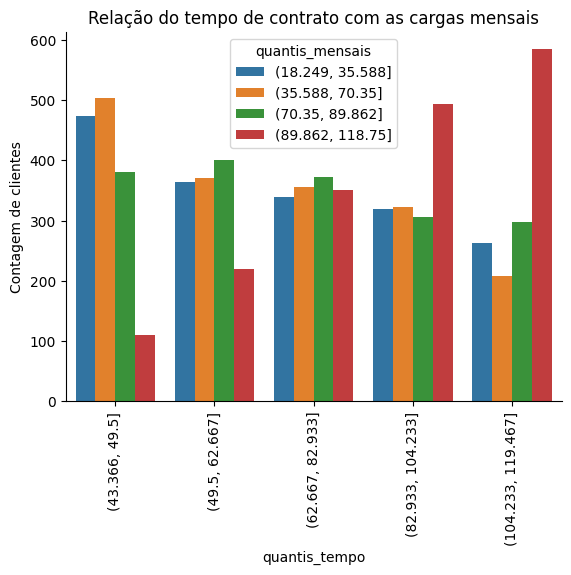

In [43]:
sns.countplot(x = 'quantis_tempo', data=df_geral, hue = 'quantis_mensais')
_ = plt.title('Relação do tempo de contrato com as cargas mensais')
plt.ylabel('Contagem de clientes')
plt.xticks(rotation = 90)
sns.despine()
plt.show()

O Objetivo da análise acima foi de procurar identificar como as cargas mensais se comportam ao longo do tempo.

Podemos ver que quanto maior a faixa de carga mensal, maior tende a ser o tempo de contrato. Ao mesmo tempo que o oposto ocorre com as cargas mensais mais baixas.

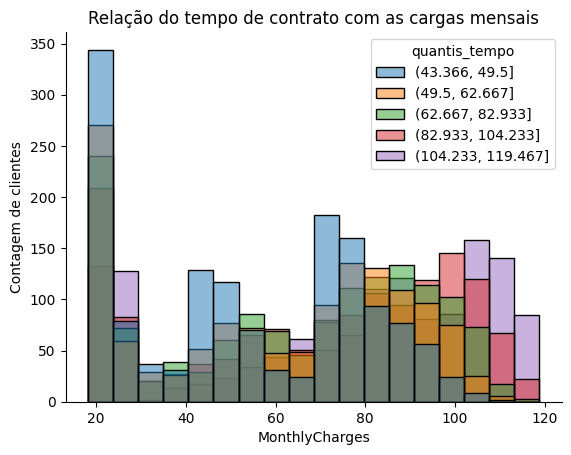

In [44]:
sns.histplot(x = 'MonthlyCharges', data=df_geral, hue = 'quantis_tempo')
_ = plt.title('Relação do tempo de contrato com as cargas mensais')
plt.ylabel('Contagem de clientes')
sns.despine()
plt.show()

Fiz esses dois gráficos acima para entender o comportamento do histograma de MonthlyCharges. E tirei a segunte conclusão:

Existem 3 picos pois cada faixa de contrato se comporta de maneira específica:
- O primeiro pico pode ser devido aos contratos iniciais que ainda possuem baixa média mensal de recarga;
- O segundo pico é devido ao aumento gradual das cargas mensais, o que faz a média subir;
- O terceito pico é pelo maior tempo de contrato, onde existem mais fatores que podem ter feito a média mensal subir, como por exemplo, valores fora dos padrões em algum meses que fazem a média subir mais ao longo do tempo.

### Matrix Correlação com contratos encerrados

In [45]:
# Matriz de correlação
df_geral = df_geral.replace({'Yes':1, 'No':0})

df_geral.corr()['encerrado'].sort_values(ascending=False)

<ipython-input-45-c755705c3115>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_geral.corr()['encerrado'].sort_values(ascending=False)


encerrado           1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
StreamingTV         0.063254
StreamingMovies     0.060860
MultipleLines       0.040033
DeviceProtection   -0.066193
OnlineBackup       -0.082307
Partner            -0.149982
Dependents         -0.163128
TechSupport        -0.164716
OnlineSecurity     -0.171270
TotalCharges       -0.199484
tempo_contrato     -0.313547
Name: encerrado, dtype: float64

Para fazer a correlação do contrato encerrado pelas demais características dos contratos, substituí todos os dados binários por números, ou seja, "yes" ficou igual a 1 e "no" igual a 0.

Pelo que recebemos ao final, foi que MonthlyCharges (0.193356), PaperlessBilling (0.191825) e SeniorCitizen (0.150889) são as que possuem mais correlação positiva e TechSupport (-0.164674), OnlineSecurity (-0.171226) e TotalCharges (-0.199484) as maiores correlações negativas.

# Conclusões

Para a realização desta tarefa carreguei os arquivos separados, verifiquei todos os dados. Depois de carregados, juntei os dados em apenas um df_geral. A partir daí começei a ajustar os dados para poder fazer as análises.

- Transformei as colunas de data no tipo datetime (BeginDate e EndDate);
- Criei a coluna encerrado para classifcar os contratos que estão ativos (0) e encerrados (1) e vimos que cerca de 26,5% dos contratos foram encerrados;
- Dados Ausentes:
   - Percbei que existiam valores ausentes nas colunas que estão relacionadas aos serviços de internet, e determinei que estavam ausentes pois não possuíam nenhum tipo de serviço de intert, por isso, preenchi os dados ausentes com "no", seguindo a lógica da coluna;
   - O mesmo provcedimento foi utilizado na coluna MultipleLines;
   - A coluna TotalCharges possuía dados ausentes, mas como representavam apenas 0,1% dos dados, resolvi retirar as linhas correspondentes.
- Adicionei o tempo de contrato de todos os contratos encerrados na coluna tempo_contratos;
- Criei categorias com pd.qcut() para separar as colunas MonthlyCharges, TotalCharges e tempo_contrato, para poder fazer visualizações e analisar como eles se comportam.

**Análises**

Após tratar e limpar os dados fiz análises entre eles.
- Analisando os dados com base na coluna encerrado
  - Contratos month-to-month possuem maior índice de churn em relação aos demais;
  - O meio de pagamento eletronic checks possui mais churn que os demais;
  - Fiber optic é a internet que mais tem índice de churn;
  - Vemos um comportamento inversamente proporcional entre os contratos ativos e os encerrados quando separamos as cargas mensais e totais por faixas. Enquanto mensal, o número de churn sobe conforme a carga média mensal também sobe, e os contratos ativos diminuem.
  - O invesro ocorre pro totalcharges
- Analisando por data de EndDate:
  - O número de churn por data de encerramento é praticamente o mesmo;
  - O número de churn por contratos do tipo mensal levando em conta as datas de encerramento são os mesmos;
  - Para o pagamento de eletronic check, todas as datas de encerramento possuem mais ou menos os menos número de churn;
  - Fiber optic possui também prarticamente os mesmos números de churn;
  - Por faixas de cargas (mensais ou totais) não existem diferenças entre as datas de saídas;
  - Existe uma certa padronização entre o tempo de duração dos contratos e as datas de saídas.

- Além destas variáveis também analisei de forma mais específica o histograma de MonthlyCharges. Ele apresentoum comportamento anormal, onde podemos ver 3 "picos" ao longo do mesmo. Para ter uma melhor visualização do comportamento, fiz algumas comparações com yempo de contratos, as faixas de tempo de contrato e EndDate.
  - Percebi que o primeiro pico da esquerda para direita é aquele que possui o menor tempo de contrato, e o que a última data de churn é que tem maior influencia;
  - No segundo pico, também é preenchido por quem possui menos tempo de contato e que as datas de encerraento estão mais pareados;
  - Já o último pico é determinado pelas datas de encerramento mais longas, ou seja, a média de charge mensal aumenta conforme o tempo de contrato aumenta, sendo diretamente proporcionais nesse caso.



**Correlação**

E para finalizar montei uma correlação das variáveis numéricas com o churn, transformei todas as variáveis bidimensionais em 0 (não) e 1 (sim).
Pelo que recebemos ao final, foi que MonthlyCharges (0.193356), PaperlessBilling (0.191825) e SeniorCitizen (0.150889) são as que possuem mais correlação positiva e TechSupport (-0.164674), OnlineSecurity (-0.171226) e TotalCharges (-0.199484) as maiores correlações negativas.


## Próximos Passos

  Para os próximos passos do projeto vou confirmar com base na EDA que fiz se as features estão de prontas para serem usadas, assim como o objetivo para o treinamento do modelo. Verificar não apenas a qualidade mas também o equilíbrio de classes.

  Para o modelo, vou testar o melhor que se enquadra para a tarefa proposta, por se tratar de um problema de classificação binária, pretendo testar Regressão Logística, Árvore de Decisão e Floresta Aleatória.
  
  Vou analisar a qualidade do modelo com AUC-ROC e acurácia.
   - a métrica AUC-ROC será utilizada porque oferece uma visão geral do desempenho de um modelo de classificação binária e é menos sensível a desequilíbrios de classe do que outras métricas. Varia entre 0 e 1, onde um valor de 0,5 indica que o modelo é tão bom quanto um classificador aleatório, e um valor próximo de 1 indica um modelo com excelente capacidade de classificação.
   - acurácia é uma métrica útil para avaliar o desempenho geral de um modelo de classificação, especialmente quando as classes estão equilibradas.

E após a análise escolher qual modelo será utilizado para a tarefa proposta no porjeto.

# Preparando o conjunto de dados para os modelos
- Árvore de Decisão
- Floresta Aleatória
- Regressão Logística

Para todos esses casos vou primeiro preparar os dados, retirando colunas que considero desnecessárias e definindo as características e objetivo dos modelos.

Sobre o objetivo vou deixar a coluna 'encerrado' que mostra se o cliente saiu (1) ou não (0) da companhia telefônica e isso será o que a predição irá nos mostrar.

Para as features vou retirar as colunas customerID que é a identificação do cliente, EndDate já que estou usando a coluna encerrado como features, e as demais colunas que criei para classificar as recargas e tempo por faizas, pois já serão trabalhadas no modelo pelas colunas "originais".

Sobre a divisão dos dados, vou fazer 80% para Treino e 20% para os testes dos modelos.

Além disso, vou seguir algumas regras, por exemplo, preciso transformar as colunas de caracteísticas em númericas e ajustar a escala dos dados.

Então para os modelos de Árvore de Decisão e Floresta Aleatória, vou usar a Classificação One-Hot para transformar as variáveis categóricas e após isso vou usar a padronização dos dados para escalabilidade das colunas. E antes de treinar o modelo, vou utilizar GridSearchCV para procurar em cada modelo, qual os melhores hiperparâmetros utilizar para aumentar a eficácia dos modelos.

Já para o modelo de Regressão Logística, vou usar a Codificação de Rótulos para transformar as variáveis categóricas, e após usar a padronização dos dados para escalabilidade das colunas.

In [46]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

target = df_geral['encerrado']
features = df_geral.drop('encerrado', axis=1)

In [47]:
# ajustando os dados

features = features.drop(columns = ['customerID', 'EndDate', 'quantis_tempo', 'quantis_mensais', 'quantis_total'])
features.info()
features = features.astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   int64  
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  gender            7032 non-null   object 
 14  SeniorCitizen     7032 non-null   int64  
 15  Partner           7032 non-null   int64  
 16  Dependents        7032 non-null   int64  


No código acima retirei as colunas que não considero muito importanetes para o nosso modelo. São dados como o ID do cliente, data de entrada, data de saída, e as divisões de valores de tempo de contrato, e recargas mensais e totais. Não considero a data de saída e entrada muito importante pro modelo, pois eu criei uma nova coluna que nos mostra se o cliente já saiu ou não e o tempo de contrato do mesmo, e as métricas de valores já estão representadas pelos seus números em cada coluna.

In [48]:
encoder = OrdinalEncoder()
features_ordinal = pd.DataFrame(encoder.fit_transform(features), columns=features.columns)

In [49]:
features_ordinal

,BeginDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,tempo_contrato
0,75.0,0.0,1.0,2.0,446.0,2504.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.0
1,42.0,1.0,0.0,3.0,801.0,1465.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,53.0
2,72.0,0.0,1.0,3.0,739.0,156.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.0
3,31.0,1.0,0.0,0.0,570.0,1399.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.0
4,71.0,0.0,1.0,2.0,1032.0,924.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,52.0,1.0,1.0,3.0,1294.0,1596.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,43.0
7028,4.0,1.0,1.0,1.0,59.0,5697.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,15.0
7029,65.0,0.0,1.0,2.0,441.0,2993.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,30.0
7030,69.0,0.0,1.0,3.0,1098.0,2659.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,26.0


## Dividindo o conjunto de dados

In [50]:
from sklearn.preprocessing import StandardScaler

# Escala dos dados
numeric = ['MonthlyCharges', 'TotalCharges', 'tempo_contrato', 'BeginDate']

scaler = StandardScaler()
scaler.fit(features_ordinal[numeric])
features_ordinal[numeric] = scaler.transform(features_ordinal[numeric])

In [51]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_ordinal, target, test_size=0.20, random_state=12345)

Dividi o conjunto de dados em target e features, ou seja, como precisamos saber se o cliente vai sair ou não, a oluna 'encerrado' nos mostra isso. E features são as características que podem levar a esse resultado.

Além disso, já dividi os conjuntos em treino e teste, sendo o cojuntode treino com 80% dos dados e o de teste com 20%.

## Árvore de decisão

Antes de rodar o modelo de Árvore de Decisão, vou ajustar os hiperparâmetros para obtermos o melhor resultado do modelo, e evitar possíveis problemas.

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_dtc = DecisionTreeClassifier(random_state=12345)

# Vamos passar para o GridSearchCV o modelo preditivo, a vizinhança de hiperparâmetros,
# a função de desemepnho e o número de partições do conjunto de dados:
grid_search = GridSearchCV(estimator = model_dtc,
                              param_grid = {'max_depth':range(1,50),
                                            'min_samples_split': [2, 5, 10],
                                            'min_samples_leaf': [1, 2, 5]},
                              scoring='roc_auc', cv = 3)

# Realizando a otimização por GridSearch para os dados de cancer de mama:
grid_search.fit(features_train,target_train)

#Vamos ver informações relevantes:
grid_search.best_params_


{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}

Aqui podemos ver que os hiperparâmetros testados e que apresentaram os melhores resultados foram;
- 'max_depth' = 7
- 'min_samples_split'= 2
- 'min_samples_leaf' = 5

Vamos utilizar eles agora no nosso modelo e verificar como foi.

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Treinar o modelo com os dados de treinamento
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth = 7, min_samples_leaf = 5, min_samples_split=2)
model_dtc.fit(features_train,target_train)

# Fazer previsões nos dados de teste
target_pred = model_dtc.predict(features_test)

# Calcular métricas de avaliação
accuracy = accuracy_score(target_test, target_pred)
target_one_pred = model_dtc.predict_proba(features_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_one_pred)

print('Acurácia = ', accuracy)
print('AUC-ROC = ', roc_auc)

Acurácia =  0.8159203980099502
AUC-ROC =  0.866650773090731


Após treinar o modelo, ralizar as predições verificamos as métricas de avaliação. Podemos ver que o modelo apresentou acurácia de 0,81 e AUC-ROC de 0,87. O modelo está bem ajustado e parece atender muito bem ao projeto. Vamos verificar os demais.

## Floresta Aleatória

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Criar o modelo de Árvore de Decisão
model_rfc = RandomForestClassifier(random_state=12345)

# Definir os hiperparâmetros a serem ajustados
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10]}

## Criar um objeto GridSearchCV
grid_search = GridSearchCV(model_rfc, param_grid, cv=5, scoring='roc_auc')

# Realizar a busca em grade nos dados de treinamento
grid_search.fit(features_train, target_train)

# Melhores hiperparâmetros encontrados
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

In [58]:
# Treinar o modelo com os dados de treinamento

model_rfc = RandomForestClassifier(random_state= 12345, max_depth = None, min_samples_split = 5, n_estimators = 200)
model_rfc.fit(features_train,target_train)

# Fazer previsões nos dados de teste
target_pred = model_rfc.predict(features_test)

# Calcular métricas de avaliação
accuracy = accuracy_score(target_test, target_pred)
target_one_pred = model_rfc.predict_proba(features_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_one_pred)

print('Acurácia = ', accuracy)
print('AUC-ROC = ', roc_auc)

Acurácia =  0.8450604122245914
AUC-ROC =  0.8839777455939948


## Regressão Logística


In [59]:
target = df_geral['encerrado']
features = df_geral.drop('encerrado', axis=1)

features = features.drop(columns = ['customerID','EndDate', 'quantis_tempo', 'quantis_mensais', 'quantis_total'])

features_ohe = pd.get_dummies(features, drop_first=True)

In [60]:
# Escala dos dados

numeric = ['MonthlyCharges', 'TotalCharges', 'tempo_contrato']

scaler = StandardScaler()
scaler.fit(features_ohe[numeric])
features_ohe[numeric] = scaler.transform(features_ohe[numeric])

In [61]:
features_train, features_test, target_train, target_test = train_test_split(
    features_ohe, target, test_size=0.20, random_state=12345)

In [63]:
from sklearn.linear_model import LogisticRegression

# Treinando o modelo
model_rl = LogisticRegression(random_state=12345, solver='liblinear')
model_rl.fit(features_train,target_train)

# Fazer previsões nos dados de teste
target_pred = model_rl.predict(features_test)

# Calcular métricas de avaliação
accuracy = accuracy_score(target_test, target_pred)
target_one_pred = model_rl.predict_proba(features_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_one_pred)

print('Acurácia = ', accuracy)
print('AUC-ROC = ', roc_auc)

Acurácia =  0.814498933901919
AUC-ROC =  0.860986455613577


# Conclusão

Fizemos todos os treinos e testes dos modelos Árvore de Decisão, Floresta Aleatória e Regressão Logpística. Todos apresentaram resultados satisfatórios quanto acurácia e AUC-ROC, ambas as métricas tiveram resultado acima de 0,81.

Mas se formos analisar qual o melhor modelo, acredito que vamos usar o modelo de Floresta Aleatória, pois foi aquele que apresentou os melhores resultados dos teste em relação às métricas analisadas e comparando com os demais modelos.
